Saving Employee Survey Responses.xlsx to Employee Survey Responses.xlsx


,Positive Responses,Negative Responses,Neutral Responses
0,"""I appreciate the flexibility in work hours, b...","""The remote work policy has been a blessing. I...","""I don’t feel like leadership values employee ..."
1,"""The team is great, but workload distribution ...","""There's no clear path for promotions. Feels l...","""There’s a toxic manager in my department, and..."
2,"""Management is transparent, and I feel heard. ...","""I appreciate the mental health initiatives, b...","""The company preaches work-life balance, but i..."
3,"""The new HR policies are fair and beneficial, ...","""The benefits package is solid, but salary inc...","""I appreciate the open-door policy. I feel lik..."
4,"""Why do we have so many meetings? Half of them...","""The office space is outdated and uncomfortabl...","""I feel valued here, and that’s what keeps me ..."
...,...,...,...
63,"""HR needs to work on being more proactive.""",,
64,"""We need more frequent check-ins from manageme...",,
65,"""HR policies are fine, but execution is incons...",,
66,"""I like my job, but I wish I had more opportun...",,


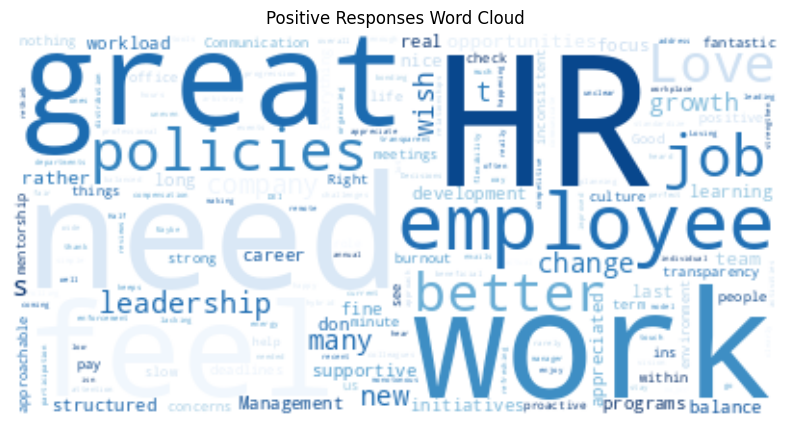

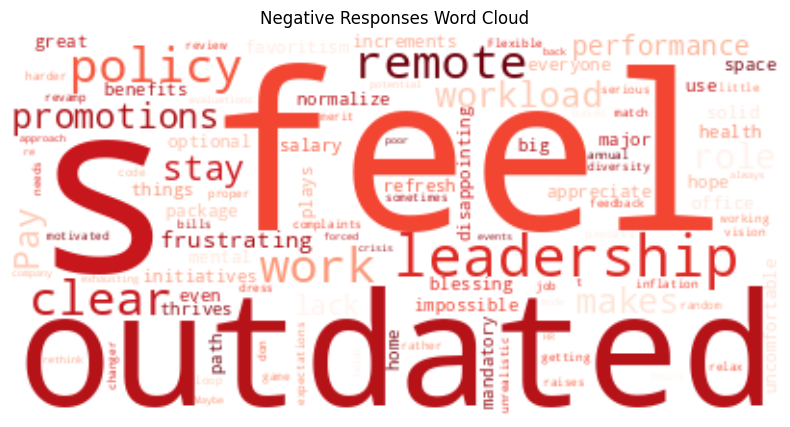

✅ Analysis Complete!


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from collections import Counter
import re
from google.colab import files
import io

# Step 1: Upload File
uploaded = files.upload()  # Prompt user to upload file
file_name = list(uploaded.keys())[0]  # Get the uploaded file name

# Step 2: Load Excel File
df = pd.read_excel(io.BytesIO(uploaded[file_name]), sheet_name=0)  # Load first sheet

# Step 3: Extract Text Data (Assumes only 1 column)
column_name = df.columns[0]  # Get the first column name
df['Responses'] = df[column_name].astype(str)  # Ensure all responses are strings

# Step 4: Text Cleaning Function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

df['Cleaned Responses'] = df['Responses'].apply(clean_text)

# Step 5: Sentiment Analysis Function
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Cleaned Responses'].apply(get_sentiment)

# Step 6: Categorize Responses
positive_responses = df[df['Sentiment'] == "Positive"]['Responses'].tolist()
negative_responses = df[df['Sentiment'] == "Negative"]['Responses'].tolist()
neutral_responses = df[df['Sentiment'] == "Neutral"]['Responses'].tolist()

# Step 7: Display Sentiment Categorization in a DataFrame
max_length = max(len(positive_responses), len(negative_responses), len(neutral_responses))

# Padding lists with empty strings to make them equal in length
positive_responses += [""] * (max_length - len(positive_responses))
negative_responses += [""] * (max_length - len(negative_responses))
neutral_responses += [""] * (max_length - len(neutral_responses))

sentiment_df = pd.DataFrame({
    "Positive Responses": positive_responses,
    "Negative Responses": negative_responses,
    "Neutral Responses": neutral_responses
})

# Display Sentiment DataFrame
from IPython.display import display
display(sentiment_df)

# Step 8: Generate Word Clouds
stopwords = set(STOPWORDS)

# Word Cloud for Positive Responses
positive_text = ' '.join(positive_responses)
positive_wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap="Blues").generate(positive_text)

# Word Cloud for Negative Responses
negative_text = ' '.join(negative_responses)
negative_wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap="Reds").generate(negative_text)

# Plot Positive Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Responses Word Cloud")
plt.show()

# Plot Negative Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Responses Word Cloud")
plt.show()

print("✅ Analysis Complete!")